In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import confusion_matrix
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from scipy import stats

Continuous Variables 
* Age : Customer's age in completed years		
* Experience : #years of professional experience		
* Income :	Annual income of the customer ($000)

* CCAvg : Avg. spending on credit cards per month ($000)	

* Mortgage	: Value of house mortgage if any. ($000)				


Categorical Variables 
* ZIPCode : 	Home Address ZIP code.	
* Family :	Family size of the customer				
* Education :	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional				
* Personal Loan : 	Did this customer accept the personal loan offered in the last campaign?		
* Securities Account	: Does the customer have a securities account with the bank?	
* CD Account : Does the customer have a certificate of deposit (CD) account with the bank?				
* Online :	Does the customer use internet banking facilities?				
* CreditCard	: Does the customer use a credit card issued by the Bank?			

In [2]:
df = pd.read_excel('Bank_Personal_Loan_Modelling-1-1-1.xlsx','Data')
df.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [3]:
df.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

In [4]:
df.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [5]:
df = df.round({'CCAvg': 2})

In [6]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [7]:
missing_values_table(df)

Your selected dataframe has 14 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
df.shape

(5000, 14)

# Treat Negative Experience

In [10]:
df.shape

(5000, 14)

In [11]:
df = df[(df[['Experience']] >= 0).all(1)]
df.shape

(4948, 14)

### Outlier Treatment for Income

In [12]:
# remove all rows that have outliers 
from scipy import stats
# df_clean = df[((df.Income - df.Income.mean()) / df.Income.std()).abs() < 3]
# df_clean.shape
df_clean = df.copy()

In [13]:
# df1 = df.copy()
df1 = df_clean.drop(['ID'],axis =1)
df1.corr()['PersonalLoan']

Age                 -0.014204
Experience          -0.014121
Income               0.504228
ZIPCode              0.000251
Family               0.063088
CCAvg                0.369388
Education            0.138339
Mortgage             0.142322
PersonalLoan         1.000000
SecuritiesAccount    0.022216
CDAccount            0.315769
Online               0.006175
CreditCard           0.002776
Name: PersonalLoan, dtype: float64

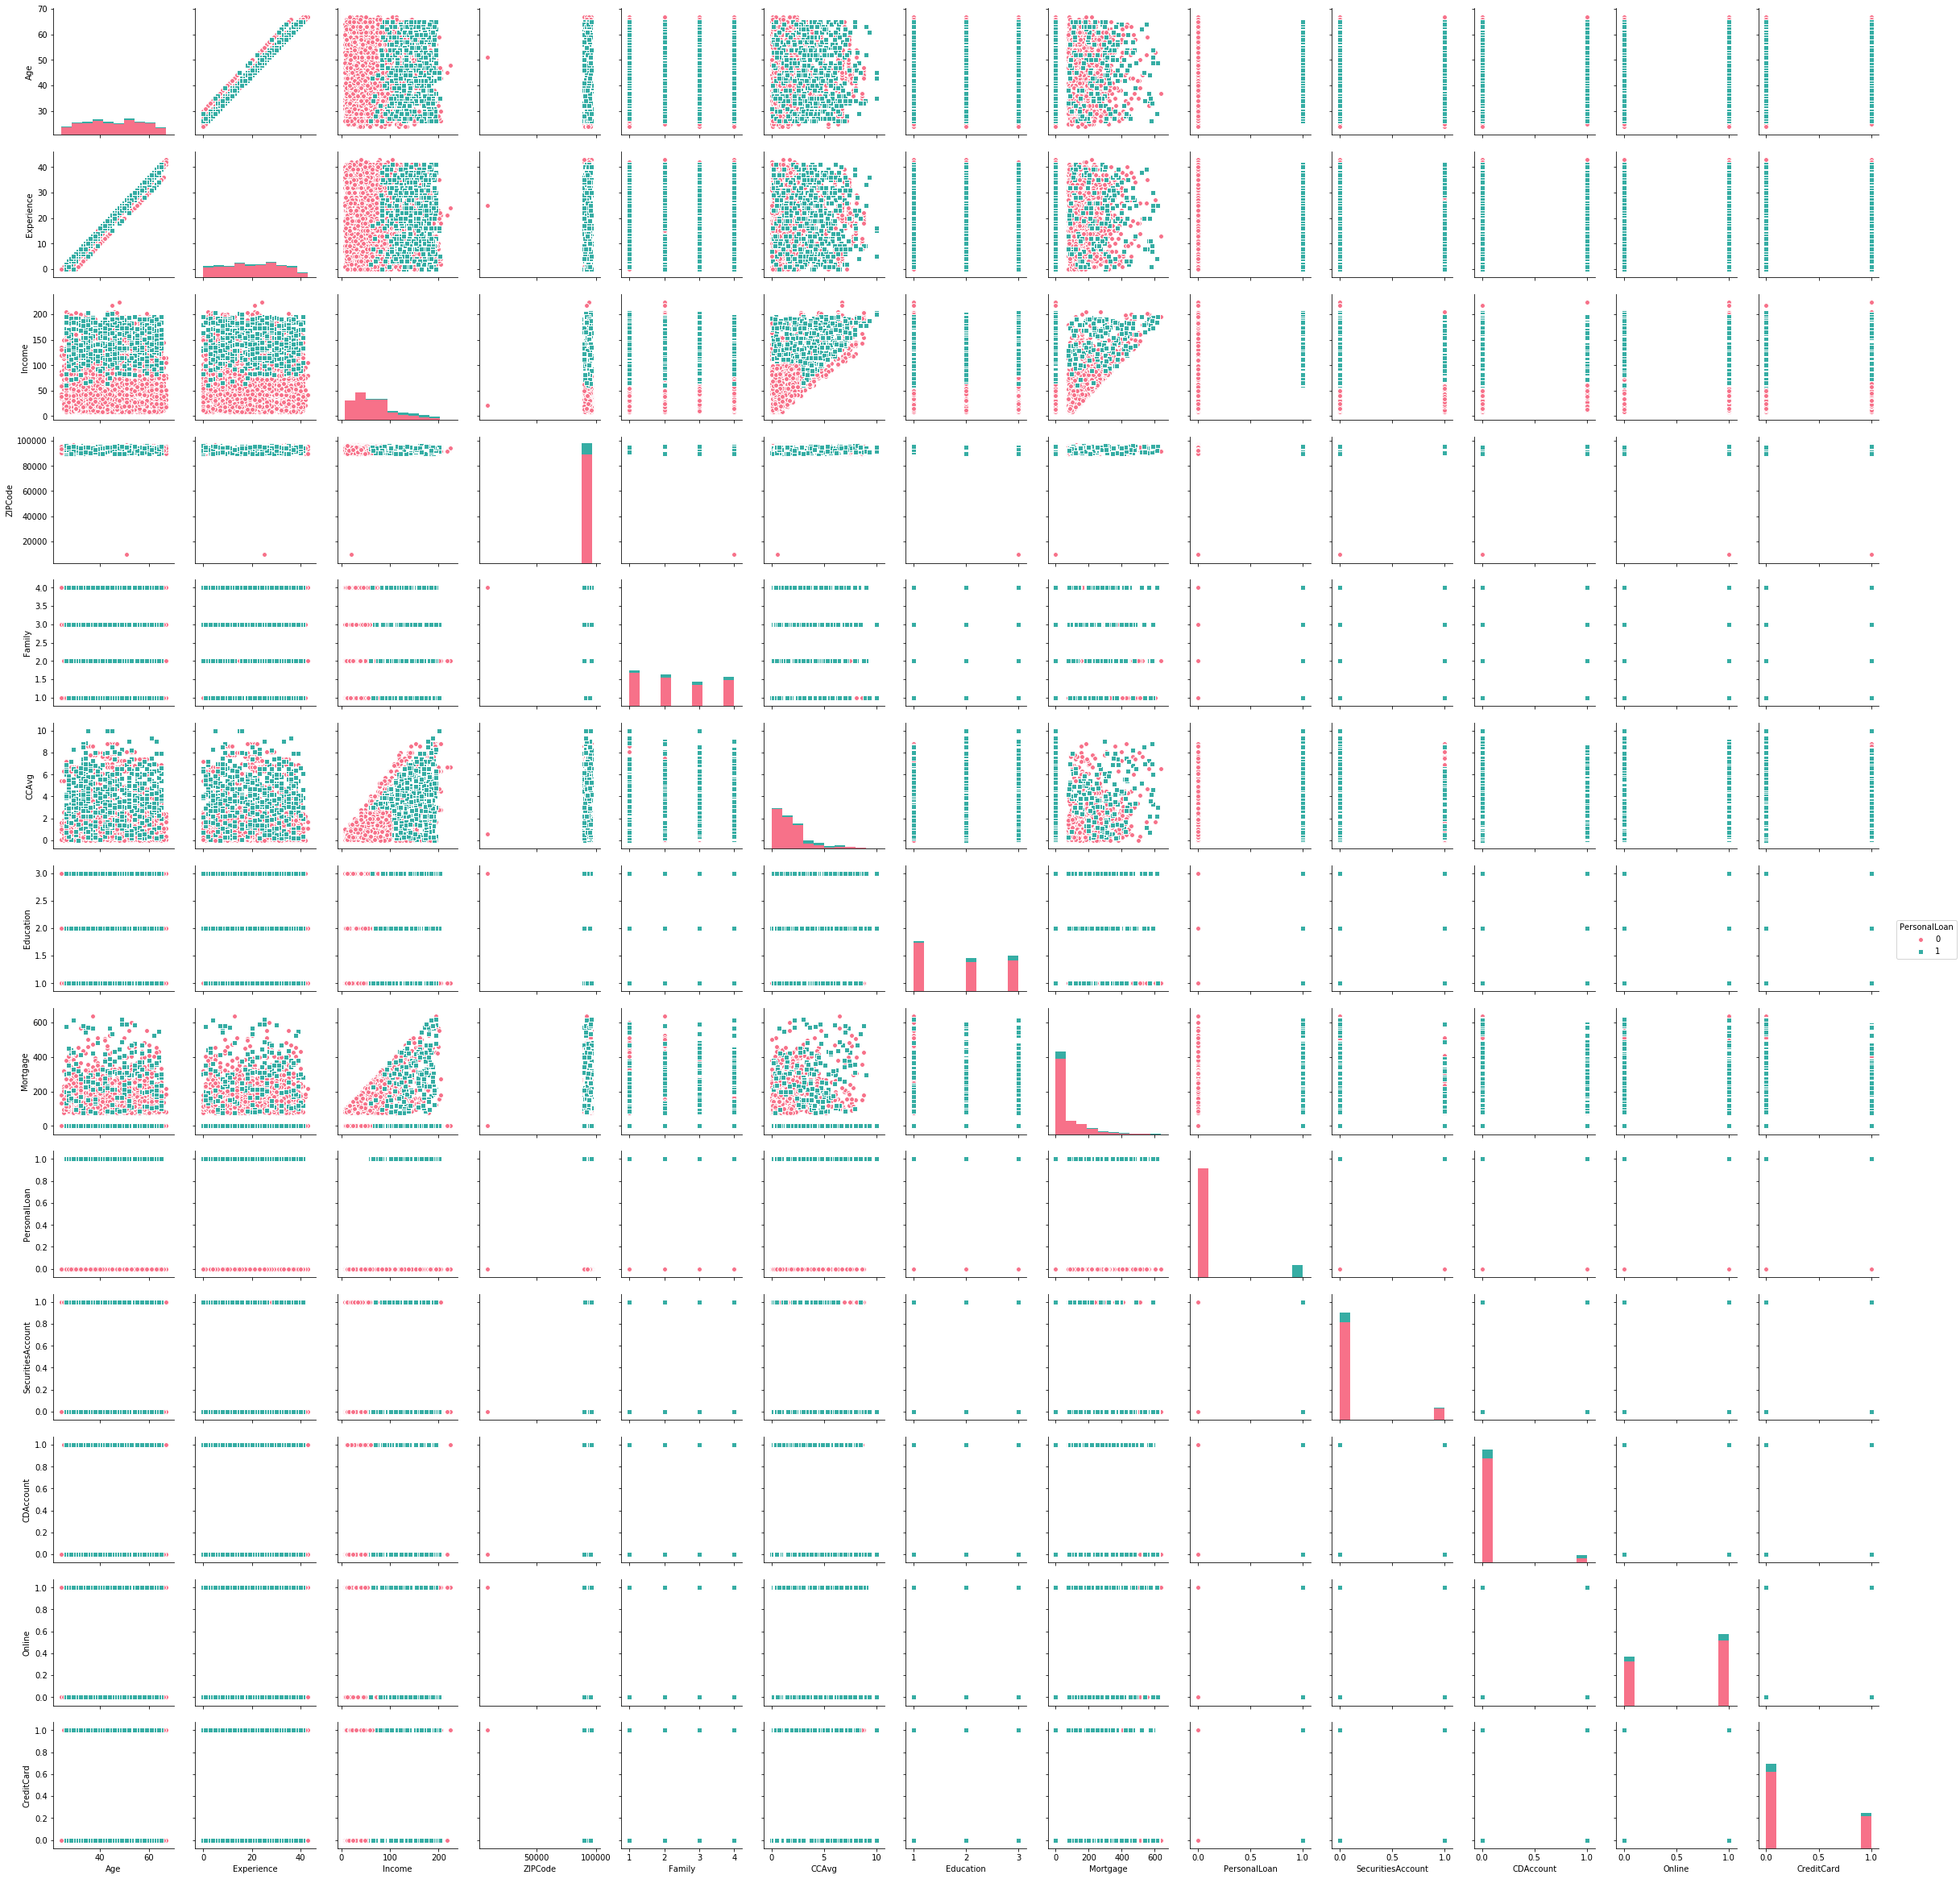

In [14]:
from seaborn import 
sns1 = sns.pairplot(df1, hue="PersonalLoan", palette="husl",markers=["o", "s"])

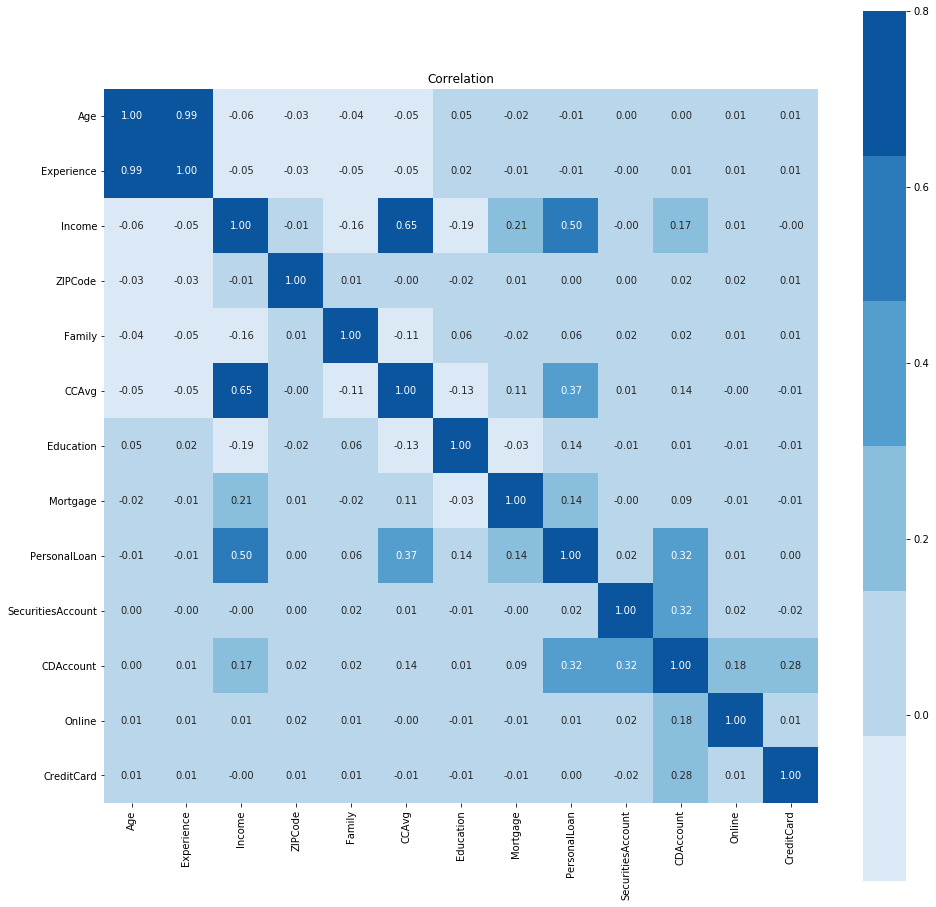

In [15]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(16,16))
my_cmap = ListedColormap(sns.mpl_palette("Blues"))
ax = sns.heatmap(df1.corr(), vmax=.8, fmt='.2f', annot=True, square=True,cmap=my_cmap)
plt.title('Correlation')
plt.show()

# Observations: 
**Independent Variables:**
* Age and Experience are highly co-related
* Income and CCAvg are also corelated

**Dependent Variables:**
* Personal Loan and Income are somewhat correlated.

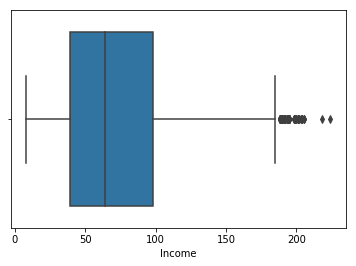

In [16]:
ax = sns.boxplot(x="Income", hue="PersonalLoan" , data=df_clean)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


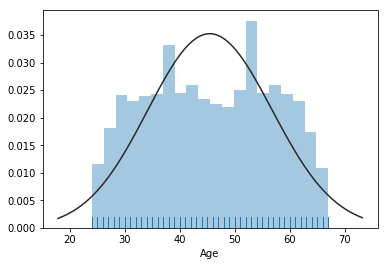

In [17]:
ax = sns.distplot(df_clean["Age"], bins=20, kde=False, rug=True, fit=stats.gamma);

Most of the customers age fall in the age range of 30 to 60 yrs and their experience falls in the range of 5 to 35 years and most earn an income between 10K to 100K.

Peaking around Customer aged 45 years.



# Influence of Income level vs Personal Loan across Education Levels.

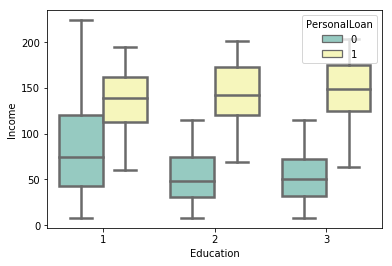

In [18]:
sns1 = sns.boxplot(x="Education", y="Income", hue="PersonalLoan", data=df_clean, palette="Set3",linewidth=2.5, order=[1,2,3] )

The box plots show that those with education level 1 have higher incomes. 
But customers who go for personal loans have the same income distribution regardless of the education level.


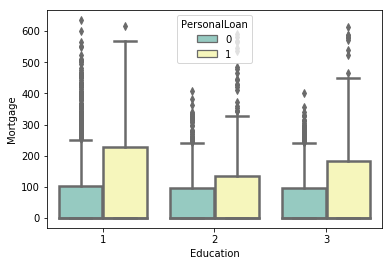

In [19]:
ax = sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=df_clean,palette="Set3",linewidth=2.5 )

Inference : Mortage and Education dont have a combined impact / donot show any pattern with opting for a Personal Loan

# Zip Code and Personal Loan

In [20]:
zipcode_top5 = df_clean[df_clean.PersonalLoan==1]['ZIPCode'].value_counts().head()
zipcode_top5

94720    19
94305    13
92093     9
90095     8
90089     8
Name: ZIPCode, dtype: int64

## Inference All zip codes belong to the same state, not much inference can be derived.

# Family Size and Personal Loan

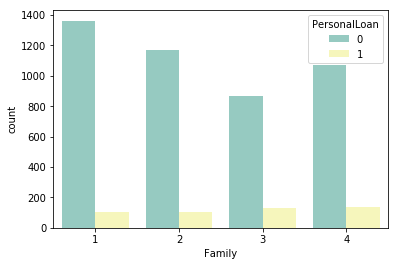

In [21]:
sns1 = sns.countplot(x="Family", data=df_clean,hue="PersonalLoan",palette="Set3",linewidth=2.5,)

## Inference: Family size does not have any impact on decision to take a loan.

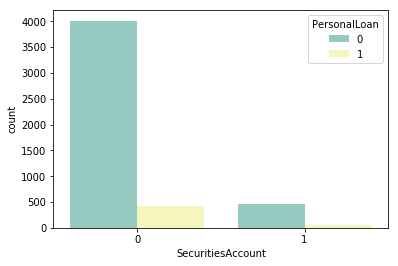

In [22]:
sns1 = sns.countplot(x="SecuritiesAccount", data=df_clean,hue="PersonalLoan",palette="Set3",linewidth=2.5)

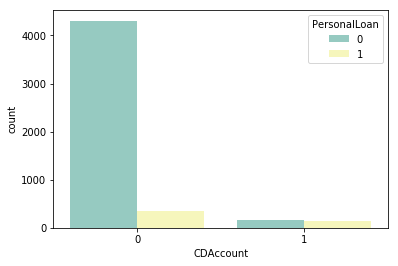

In [23]:
sns1 = sns.countplot(x="CDAccount", data=df_clean,hue="PersonalLoan",palette="Set3",linewidth=2.5)

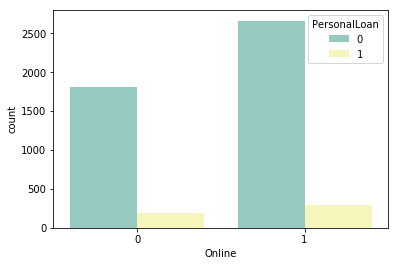

In [24]:
sns1 = sns.countplot(x="Online", data=df_clean,hue="PersonalLoan",palette="Set3",linewidth=2.5)

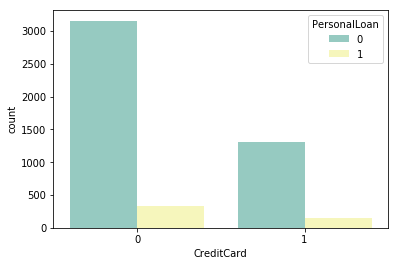

In [25]:
sns1 = sns.countplot(x="CreditCard", data=df_clean,hue="PersonalLoan",palette="Set3",linewidth=2.5)

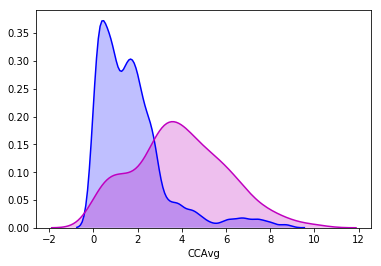

In [26]:
distplt1 = sns.distplot( df_clean[df_clean.PersonalLoan == 0]['CCAvg'],hist=False, color = 'b',kde_kws={"shade": True})
distplt1 = sns.distplot( df_clean[df_clean.PersonalLoan == 1]['CCAvg'],hist=False, color = 'm',kde_kws={"shade": True})

# Inference
** Customers who have taken personal loan have higher credit card average than those who did not take the personal loan.  
High credit card average seems to be good predictor of whether or not a customer will take a personal loan.**

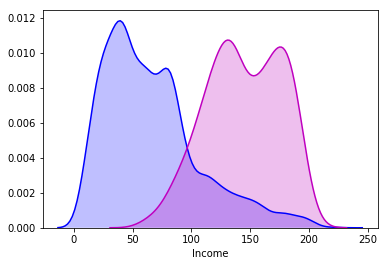

In [27]:
sns1 = sns.distplot( df_clean[df_clean.PersonalLoan == 0]['Income'], hist=False, color = 'b',kde_kws={"shade": True})
sns1 = sns.distplot( df_clean[df_clean.PersonalLoan == 1]['Income'], hist=False, color = 'm',kde_kws={"shade": True})

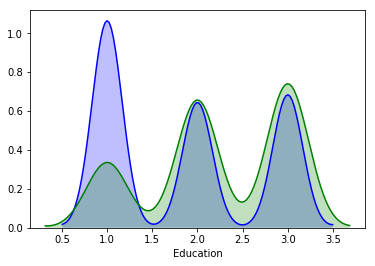

In [28]:
sns1 = sns.distplot( df_clean[df_clean.PersonalLoan == 0]['Education'], hist=False, color = 'b',kde_kws={"shade": True})
sns1 = sns.distplot( df_clean[df_clean.PersonalLoan == 1]['Education'], hist=False, color = 'g',kde_kws={"shade": True})

# Inference
**Advanced/Professionals have a higher tendency to take a Personal Loan**

# Train and Test Preparation

In [29]:
import sklearn
from sklearn.model_selection import train_test_split

y = df_clean['PersonalLoan']
X = df_clean.drop(['PersonalLoan','ID','Experience','ZIPCode'],axis =1)

print (y.shape)
print (X.shape)

(4948,)
(4948, 10)


In [30]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,train_size=.7, test_size=.3, random_state=0)

# Applying the models

In [31]:
#Accuracy using Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('\nLogistic Regression')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')
print(metrics.classification_report(y_test,y_pred))


Logistic Regression
Accuracy Score: 94.81481481481482%
Confusion Matrix: 
[[1318   19]
 [  58   90]]
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1337
          1       0.83      0.61      0.70       148

avg / total       0.94      0.95      0.94      1485



In [32]:
#Accuracy using Naive Bayes Model - Gaussian
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
print('\nNaive Bayes Gaussian')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')
print(metrics.classification_report(y_test,y_pred))


Naive Bayes Gaussian
Accuracy Score: 88.88888888888889%
Confusion Matrix: 
[[1233  104]
 [  61   87]]
             precision    recall  f1-score   support

          0       0.95      0.92      0.94      1337
          1       0.46      0.59      0.51       148

avg / total       0.90      0.89      0.90      1485



In [33]:
#Accuracy using Naive Bayes Model - Multinomial
from sklearn.naive_bayes import MultinomialNB
MB = MultinomialNB()
MB.fit(X_train, y_train)
y_pred = MB.predict(X_test)
print('\nNaive Bayes Multinomial')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')
print(metrics.classification_report(y_test,y_pred))


Naive Bayes Multinomial
Accuracy Score: 79.7979797979798%
Confusion Matrix: 
[[1083  254]
 [  46  102]]
             precision    recall  f1-score   support

          0       0.96      0.81      0.88      1337
          1       0.29      0.69      0.40       148

avg / total       0.89      0.80      0.83      1485



In [34]:
#Accuracy using KNN Model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors =7)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print('\nK Nearest Neighbors (NN = 7)')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')
print(metrics.classification_report(y_test,y_pred))


K Nearest Neighbors (NN = 7)
Accuracy Score: 90.23569023569024%
Confusion Matrix: 
[[1294   43]
 [ 102   46]]
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1337
          1       0.52      0.31      0.39       148

avg / total       0.89      0.90      0.89      1485



In [35]:
from sklearn.svm import SVC

SVMrbf = SVC(kernel='rbf')
SVMrbf.fit(X_train,y_train)
y_pred=SVMrbf.predict(X_test)

print('\nSupport Vector Machine - RBF')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')
print(metrics.classification_report(y_test,y_pred))


Support Vector Machine - RBF
Accuracy Score: 90.5050505050505%
Confusion Matrix: 
[[1333    4]
 [ 137   11]]
             precision    recall  f1-score   support

          0       0.91      1.00      0.95      1337
          1       0.73      0.07      0.13       148

avg / total       0.89      0.91      0.87      1485



In [36]:
from sklearn.svm import SVC

SVMrbf = SVC(kernel='linear',C=0.1)
SVMrbf.fit(X_train,y_train)
y_pred=SVMrbf.predict(X_test)

print('\nSupport Vector Machine - RBF')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred)*100,'%',sep='')
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred), sep = '\n')
print(metrics.classification_report(y_test,y_pred))


Support Vector Machine - RBF
Accuracy Score: 95.35353535353536%
Confusion Matrix: 
[[1323   14]
 [  55   93]]
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1337
          1       0.87      0.63      0.73       148

avg / total       0.95      0.95      0.95      1485



In [37]:
import time
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(n_neighbors =7),
    "Linear SVM": SVC(kernel = 'linear', C = 0.1),
    "RBF SVM": SVC(kernel='rbf',C=0.1),
    "Naive Bayes Gaussian": GaussianNB(),
}

In [38]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        classifier.fit(X_train, y_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        count+=1
    return df_results

In [39]:
df_results = batch_classify(X_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))

             classifier  train_score  training_time
2            Linear SVM     0.950621       1.070405
0   Logistic Regression     0.949177       0.034125
1     Nearest Neighbors     0.937915       0.013391
3               RBF SVM     0.904129       0.396476
4  Naive Bayes Gaussian     0.881028       0.001587


**After comparing the performances, 
SVM-Linear, has accuracy of 95% which is good and also has a recall of 63%**
